In [1]:
import pandas as pd
import numpy as np
import os
import sys
import seaborn as sns 
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from scipy.stats import linregress
import EpiClockInvasiveBRCA.src.util as epi_util
consts = epi_util.consts
import util_loyferNormals as local_util

from sklearn.linear_model import LinearRegression

In [10]:
TCGA_methyl_Clock = pd.read_table(os.path.join(consts['official_indir'], 'TCGA', 'TCGA.methyl.balancedSites.tsv'), index_col=0)
TCGA_methyl_Clock = TCGA_methyl_Clock.rename(columns=epi_util.sampleToPatientID)

In [24]:
TCGA_methyl_Clock

,TCGA-D8-A27G,TCGA-E2-A1B1,TCGA-AN-A0XO,TCGA-AR-A255,TCGA-GM-A5PV,TCGA-S3-A6ZG,TCGA-OL-A66N,TCGA-UL-AAZ6,TCGA-LL-A5YM,TCGA-LD-A7W5,...,TCGA-E2-A1IL,TCGA-AC-A2FM,TCGA-B6-A1KF,TCGA-AO-A0JF,TCGA-A2-A04R,TCGA-D8-A1XW,TCGA-E2-A1AZ,TCGA-C8-A26V,TCGA-AR-A0TP,TCGA-EW-A2FV
cg00467244,0.765821,0.163875,0.768284,0.841406,0.256586,0.939187,0.814828,0.632245,0.410079,0.663765,...,0.091014,0.918690,0.989873,0.119700,0.838542,0.023671,0.370857,0.102202,0.926408,0.546149
cg26942432,0.923978,0.442241,0.950996,0.399408,0.249211,0.658178,0.396906,0.968012,0.306221,0.901920,...,0.152789,0.948708,0.057192,0.493335,0.763881,0.445414,0.539894,0.146347,0.067433,0.691451
cg00011616,0.968080,0.217397,0.218409,0.493724,0.149253,0.556858,0.515964,0.960957,0.951621,0.848249,...,0.094923,0.967406,0.069667,0.382504,0.025772,0.303100,0.343949,0.935045,0.103162,0.226646
cg25916282,0.680924,0.282701,0.854183,0.781915,0.181898,0.870708,0.902721,0.922257,0.898583,0.434969,...,0.881157,0.941230,0.968413,0.764036,0.065513,0.110802,0.098980,0.606278,0.821508,0.202033
cg16135989,0.759591,0.478533,0.814554,0.874704,0.435364,0.951123,0.795617,0.957609,0.813781,0.370894,...,0.403757,0.968614,0.162526,0.564249,0.033021,0.128375,0.195602,0.155532,0.966026,0.870539
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
cg07318609,0.610217,0.268551,0.707705,0.383356,0.717327,0.589244,0.844370,0.857835,0.695190,0.384250,...,0.576172,0.876456,0.803869,0.505777,0.887755,0.318966,0.143393,0.805452,0.897366,0.393154
cg08959182,0.655384,0.699199,0.742735,0.349314,0.274549,0.603205,0.349163,0.247209,0.915124,0.539425,...,0.299604,0.542061,0.196197,0.606745,0.559940,0.468192,0.816815,0.930520,NaN,0.413457
cg20390015,0.711192,0.413556,0.232918,0.364752,0.319208,0.461660,0.356774,0.171339,0.407258,0.596785,...,0.668288,0.464769,0.792212,0.601464,0.147746,0.735613,0.807595,0.322215,0.638000,0.350140
cg15292097,0.538614,0.541039,0.156808,0.427035,0.383464,0.244195,0.302947,0.339663,0.252008,0.713016,...,0.254008,0.663123,0.817517,0.375878,0.205412,0.764559,0.804663,0.245287,0.933266,0.620109


In [33]:
c_beta = 1 - TCGA_methyl_Clock.std(axis=0)
linregress(c_beta, clinical['CPE'])

LinregressResult(slope=-1.2119906343603934, intercept=1.7283449581431964, rvalue=-0.6694965418120506, pvalue=1.1788708616882195e-83, stderr=0.05349006831395087, intercept_stderr=0.042188288855665494)

In [ ]:
linregress

In [ ]:
clinical = pd.read_table(os.path.join(consts['official_indir'], 'TCGA', 'TCGA.clinical.tsv'))
clinical = clinical.set_index('submitter_id')
clinical = clinical.loc[TCGA_methyl_Clock.columns]

In [157]:
def summarizeCorrelationEffect(beta_values, quadratic, n_sites=100):
    # Calculate R2 between a site's beta values across tumors and the CPE purity values
    R2_list = []
    for site in beta_values.index:
        site_ser = beta_values.loc[site]
        site_ser = site_ser.fillna(site_ser.mean())
        rvalue = linregress(site_ser, clinical['CPE']).rvalue

        if quadratic:
            X = np.vstack([site_ser.values, site_ser.values**2]).T
        else:
            X = np.reshape(site_ser.values, [-1,1])
        
        y = clinical['CPE'].values
        lm = LinearRegression()
        lm.fit(X, y)
        R2 = lm.score(X, y)

        R2_list.append(R2)
    R2_ser = pd.Series(index=beta_values.index, data=R2_list)

    # Plot dsitribution correlation values
    plt.hist(R2_ser, bins=40)

    # Try least correlating sites
    # Calculate c_beta and see how it correlates with purity
#     notCorrelating_sites = R2_ser.index[R2_ser < 0.0001]
    notCorrelating_sites = R2_ser.sort_values()[:n_sites].index
    print(f"Max R^2 = {R2_ser[notCorrelating_sites[-1]]:.4f}")
    print(notCorrelating_sites.shape)
    c_beta_notCorrelating = 1 - beta_values.loc[notCorrelating_sites].std(axis=0)
    print(linregress(c_beta_notCorrelating, clinical['CPE']))
    return notCorrelating_sites

Max R^2 = 0.0006
(60,)
LinregressResult(slope=-1.1750515256768688, intercept=1.7059917002855645, rvalue=-0.6584233885703715, pvalue=4.875425316886641e-80, stderr=0.053429965277122626, intercept_stderr=0.04244835911324622)


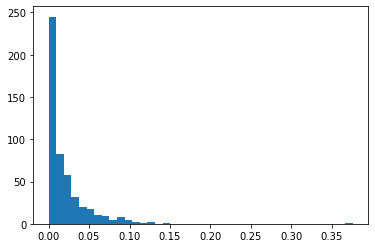

In [135]:
summarizeCorrelationEffect(TCGA_methyl_Clock, quadratic=False, n_sites=60)

Max R^2 = 0.0571
(10,)
LinregressResult(slope=-0.5214302598599285, intercept=1.1920027893159468, rvalue=-0.32857090536123074, pvalue=1.9994933895794387e-17, stderr=0.05962124409637534, intercept_stderr=0.047872716096943276)


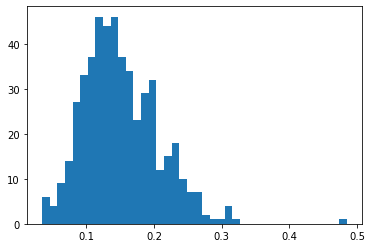

In [138]:
summarizeCorrelationEffect(TCGA_methyl_Clock, quadratic=True, n_sites=10)

In [ ]:
TCGA_methyl_unbiasedSites = pd.read_table('/Users/danielmonyak/Library/CloudStorage/Box-Box/PROJECT 06023: MolClocks/PanCancer_Paper/Datasets/beta_values_unbiased_sites/BRCA.methyl.unbiased_sites.tsv', index_col=0)

In [141]:
c_beta_unbiased = 1 - TCGA_methyl_unbiasedSites.std(axis=0)
linregress(c_beta_unbiased, clinical['CPE'])

LinregressResult(slope=-1.5077814283314024, intercept=2.032273765307147, rvalue=-0.7032771803459155, pvalue=1.0061182191544946e-95, stderr=0.06062775157241853, intercept_stderr=0.0506451532344555)

In [143]:
TCGA_methyl_unbiasedSites.shape

(12905, 634)

Max R^2 = 0.0000
(100,)
LinregressResult(slope=-1.4579796055547036, intercept=1.9921829814629715, rvalue=-0.669573896560856, pvalue=1.110838084808076e-83, stderr=0.06433308725941263, intercept_stderr=0.053802413566880744)


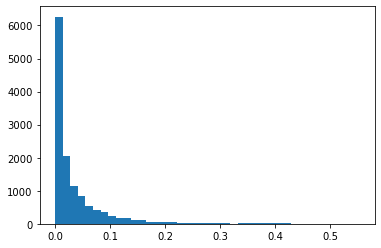

In [148]:
summarizeCorrelationEffect(TCGA_methyl_unbiasedSites, quadratic=False, n_sites=100)

Max R^2 = 0.0563
(500,)
LinregressResult(slope=-1.391220885981775, intercept=1.959100100900755, rvalue=-0.47515964325739707, pvalue=5.058075795832306e-37, stderr=0.10247811411358167, intercept_stderr=0.0873241137923681)


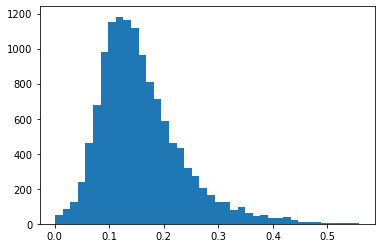

In [150]:
summarizeCorrelationEffect(TCGA_methyl_unbiasedSites, quadratic=True, n_sites=500)

Max R^2 = 0.0223
(100,)
LinregressResult(slope=-0.6925104888207699, intercept=1.3730968789298275, rvalue=-0.2506798251995668, pvalue=1.5335635271857073e-10, stderr=0.10637883217360232, intercept_stderr=0.09203433092090847)


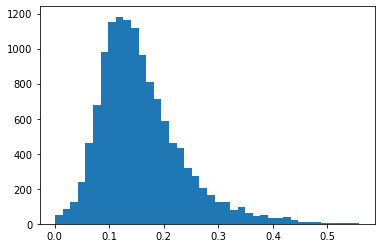

In [158]:
sites = summarizeCorrelationEffect(TCGA_methyl_unbiasedSites, quadratic=True, n_sites=100)

(array([ 3.,  4.,  2.,  5., 20., 43., 13.,  7.,  1.,  2.]),
 array([0.01330936, 0.10439002, 0.19547067, 0.28655133, 0.37763199,
        0.46871264, 0.5597933 , 0.65087395, 0.74195461, 0.83303527,
        0.92411592]),
 <BarContainer object of 10 artists>)

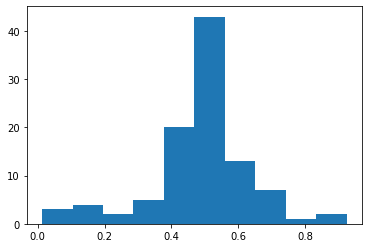

In [162]:
plt.hist(TCGA_methyl_unbiasedSites.loc[sites].iloc[:, 2])

(array([  950.,  1108.,  2269.,  7112., 18905., 20009.,  7555.,  3142.,
         1593.,   694.]),
 array([0.00951131, 0.10689099, 0.20427067, 0.30165036, 0.39903004,
        0.49640973, 0.59378941, 0.6911691 , 0.78854878, 0.88592846,
        0.98330815]),
 <BarContainer object of 10 artists>)

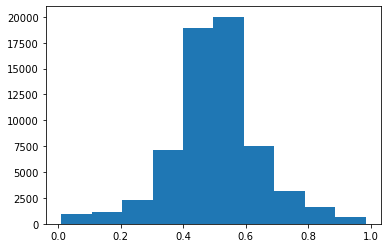

In [166]:
plt.hist(TCGA_methyl_unbiasedSites.loc[sites].values.flatten())

So also this does is just select for sites that have zero variability (stuck at 0.5)